# Event-based Camera Starter Code

This data is from the neuromorphic MNIST (n-mnist) dataset. It was constructed by pointing an event-based camera at MNIST digits as the camera was moved slightly; the cameras can only sense CHANGES in light intensity. Each pixel causes and "event" if the light intensity changes by more than a given threshold. The event indicates whether it exceeded the threshold upwards, or downwards. The output of the camera is a big list of events.

In [1]:
import math
import numpy as np
import eventvision as ev
from matplotlib.pyplot import *
%matplotlib notebook

Event-based vision module imported


In [2]:
TD = ev.read_dataset('data/5/00024.bin')

In [3]:
# Events take the form
#   (x, y, up, t)
# where
#   (x,y) is the pixel location
#   up is a Boolean indication whether the event was up or down
#   t is an integer time step (ms?)
TD.data[0]

(1, 17, True, 1462)

In [4]:
# Run through all the events, and construct visualizations:
#  blah is a 34x34 colour image
#  pup and pdown are up and down points in (x,y,t) space
pup = []
pdown = []
blah = np.zeros((34,34,3))
for td in TD.data:
    if td[2]:
        pup.append([td[0],td[1],td[3]])
        blah[td[0],td[1],0] += 1
    else:
        pdown.append([td[0],td[1],td[3]])
        blah[td[0],td[1],1] += 1
pup = np.array(pup)
pdown = np.array(pdown)
blah = blah / np.max(blah)

<IPython.core.display.Javascript object>


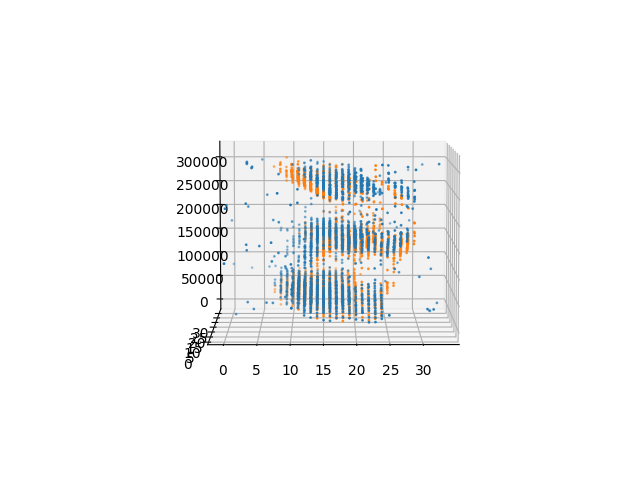

In [5]:
fig = figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(pup[:,0], pup[:,1], pup[:,2], s=1);
ax.scatter(pdown[:,0], pdown[:,1], pdown[:,2], s=1);

<IPython.core.display.Javascript object>


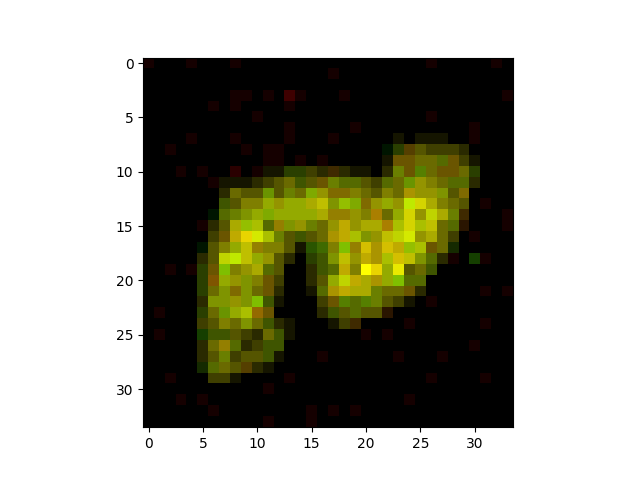

In [6]:
figure()
imshow(blah);